# BASIC MODELING FILE FOR CHINA

In [2]:
#import required libary
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the latest dataset regarding coronavirus
df = pd.read_csv('combined.csv')
df.head()

,Province/State,Country/Region,Day,Time,Confirmed,Suspected,Recovered,Deaths,Demised
0,Yunnan,Mainland China,2020-01-21,00:00:00,1.0,NaN,NaN,NaN,NaN
1,Hubei,Mainland China,2020-01-21,00:00:00,270.0,11.0,NaN,NaN,NaN
2,Zhejiang,Mainland China,2020-01-21,00:00:00,5.0,16.0,NaN,NaN,NaN
3,Henan,Mainland China,2020-01-21,00:00:00,1.0,NaN,NaN,NaN,NaN
4,Jiangxi,Mainland China,2020-01-21,00:00:00,2.0,NaN,NaN,NaN,NaN


### Here in the given dataset we are provided with various columns like "Confirmed", "Suspected", "Recovered", "Deaths", "Demised":

1. But here we are having most of the columns other than Confirmed all are having maximum null so it doesn't make any sense by keep them so I dropped all these columns with null.


In [4]:
df["Last Update"]=df["Day"]+" "+df["Time"]

In [5]:
df.drop(["Day","Time","Suspected","Recovered","Deaths","Demised"],inplace=True,axis=1)

In [6]:
df.columns=["Province/State","Country","Confirmed","Last Update"]

### Now Let's group up for country China and check how many confirmed cases are there

In [98]:
confirmed = df.query('Country=="Mainland China"').groupby("Last Update")[['Confirmed']].sum().reset_index()

confirmed["Last Update"]=pd.to_datetime(confirmed["Last Update"])

In [99]:
confirmed["Last Update"]=confirmed["Last Update"] + pd.DateOffset(1)

In [100]:
confirmed

,Last Update,Confirmed
0,2020-01-22 00:00:00,327.0
1,2020-01-23 12:00:00,549.0
2,2020-01-24 12:00:00,639.0
3,2020-01-26 22:00:00,1156.0
4,2020-01-27 23:00:00,2737.0
5,2020-01-28 20:30:00,4409.0
6,2020-01-29 23:00:00,5970.0
7,2020-01-30 21:00:00,7678.0
8,2020-01-31 21:30:00,9658.0
9,2020-02-01 19:00:00,11221.0


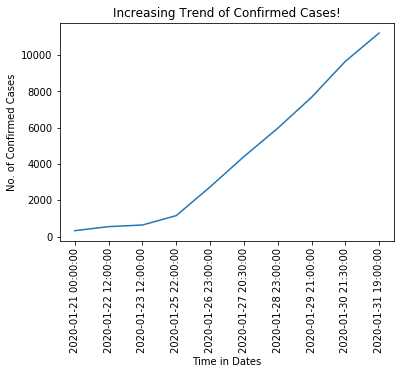

In [8]:
plt.plot(confirmed["Last Update"], confirmed["Confirmed"]) 
plt.xlabel('Time in Dates') 
plt.xticks(rotation=90)
plt.ylabel('No. of Confirmed Cases') 
plt.title('Increasing Trend of Confirmed Cases!') 
plt.show() 

### Note:
1. Since China government banned the Transportation Facilities in Wuhan and its neighbour cities which lies in Hubei province. So We are observed the in Hubei seperately and other cities collectively.


# Predicting For Hubei

  For predicting the confirmed cases of coronavirus we must take few factors into consideration like transmission Rate and population density
  
  1. For Transmission Rate, we are make use of the historical data as coronavirus belongs to family of virus Like SARS and MER. A notable common characteristic of both SARS-CoV and MERS-CoV is that they have potential for sustained community transmission and their stats show that, transmission rate lies in the 95% CrI 2·47–2·86, so being having reference of [1], we choose the transmission rate as 2.68 for china cities.
  
  
  2. We had collected the dataset for population density since denser the place is more the chance for transmission of the virus.
  

In [9]:
df.head()

,Province/State,Country,Confirmed,Last Update
0,Yunnan,Mainland China,1.0,2020-01-21 00:00:00
1,Hubei,Mainland China,270.0,2020-01-21 00:00:00
2,Zhejiang,Mainland China,5.0,2020-01-21 00:00:00
3,Henan,Mainland China,1.0,2020-01-21 00:00:00
4,Jiangxi,Mainland China,2.0,2020-01-21 00:00:00


In [10]:
df_wuhan=df.loc[df["Province/State"]== "Hubei"]

In [11]:
df_wuhan["population_density"]=820
df_wuhan["Transmission_Rate"]=2.68


/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_wuhan.drop(["Province/State","Country"],inplace=True,axis=1)

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_wuhan

,Confirmed,Last Update,population_density,Transmission_Rate
1,270.0,2020-01-21 00:00:00,820,2.68
30,444.0,2020-01-22 12:00:00,820,2.68
87,444.0,2020-01-23 12:00:00,820,2.68
112,1052.0,2020-01-25 22:00:00,820,2.68
144,1423.0,2020-01-26 23:00:00,820,2.68
212,2714.0,2020-01-27 20:30:00,820,2.68
235,3554.0,2020-01-28 23:00:00,820,2.68
291,4586.0,2020-01-29 21:00:00,820,2.68
346,5806.0,2020-01-30 21:30:00,820,2.68
379,7153.0,2020-01-31 19:00:00,820,2.68


So Here is our final dataset we are going to use for prediction of Confirmed cases.

And for modelling I had used Prophet Forecasting Model and it is giving a quite accuracy 

In [14]:
df_wuhan["Last Update"]=pd.to_datetime(df_wuhan["Last Update"])

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_wuhan["Last Update"]=df_wuhan["Last Update"] + pd.DateOffset(1)

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_wuhan

,Confirmed,Last Update,population_density,Transmission_Rate
1,270.0,2020-01-22 00:00:00,820,2.68
30,444.0,2020-01-23 12:00:00,820,2.68
87,444.0,2020-01-24 12:00:00,820,2.68
112,1052.0,2020-01-26 22:00:00,820,2.68
144,1423.0,2020-01-27 23:00:00,820,2.68
212,2714.0,2020-01-28 20:30:00,820,2.68
235,3554.0,2020-01-29 23:00:00,820,2.68
291,4586.0,2020-01-30 21:00:00,820,2.68
346,5806.0,2020-01-31 21:30:00,820,2.68
379,7153.0,2020-02-01 19:00:00,820,2.68


In [17]:
df_wuhan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 379
Data columns (total 4 columns):
Confirmed             10 non-null float64
Last Update           10 non-null datetime64[ns]
population_density    10 non-null int64
Transmission_Rate     10 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 400.0 bytes


In [18]:
df_wuhan.rename(columns = {"Confirmed":"y","Last Update":"ds"},inplace=True)

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [23]:
def cal_wuhan(df_wuhan):
    test=df_wuhan.tail(2)
    print(test.head())
    df_wuhan=df_wuhan.head(8)
    from fbprophet import Prophet
    m = Prophet()
    m.fit(df_wuhan)
    test.drop("y",inplace=True,axis=1)
    forecast = m.predict(test)
    #forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    print(forecast["yhat"])

So this will help us to train our model and get are prediction done on required dates

In [24]:
cal_wuhan(df_wuhan)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


          y                  ds  population_density  Transmission_Rate
346  5806.0 2020-01-31 21:30:00                 820               2.68
379  7153.0 2020-02-01 19:00:00                 820               2.68
0    5436.075584
1    7295.566838
Name: yhat, dtype: float64


Here, I had made prediction for three dates in Hubei Province:
    1. 31th Dec --- 5436 Confirmed Cases
    2. 1st Feb ---  7295 Confirmed Cases( A bit lower than expected but still close to the exact figure)

# For other cities

Now I am focusing on the all remaining cities of the china, I planned to train this model seperately because in all these cities Transportation Facilties are available and motion of affected and unaffected people is continued between cities and other countries too.

Hence, We decided to add data for people's movement from one cities to another. But I am unable to find it out the exact dataset so for now i had skipped this step and trained the model.

Still it made a nice prediction for required dates.

In [69]:
df_other_cities=df.loc[df["Country"]=="Mainland China"]

In [70]:
df_other_cities.drop(["Country"],inplace=True,axis=1)

In [71]:
df_other_cities=df_other_cities.loc[df["Province/State"]!="Hubei"]

In [72]:
df_other_cities.head()

,Province/State,Confirmed,Last Update
0,Yunnan,1.0,2020-01-21 00:00:00
2,Zhejiang,5.0,2020-01-21 00:00:00
3,Henan,1.0,2020-01-21 00:00:00
4,Jiangxi,2.0,2020-01-21 00:00:00
5,Guangxi,NaN,2020-01-21 00:00:00


In [73]:
df_other_cities.shape

(263, 3)

In [74]:
df_population_density=pd.read_csv("population_density.csv",header=None)

In [75]:
df_population_density.rename(columns = {0:"Province/State",1:"population_density"},inplace=True)

In [76]:
df_other_cities = pd.merge(df_other_cities, df_population_density, on='Province/State')

In [77]:
df_other_cities["Transmission_Rate"]=2.68

In [78]:
df_other_cities.head()

,Province/State,Confirmed,Last Update,population_density,Transmission_Rate
0,Yunnan,1.0,2020-01-21 00:00:00,300.0,2.68
1,Yunnan,1.0,2020-01-22 12:00:00,300.0,2.68
2,Yunnan,2.0,2020-01-23 12:00:00,300.0,2.68
3,Yunnan,19.0,2020-01-26 23:00:00,300.0,2.68
4,Yunnan,26.0,2020-01-27 20:30:00,300.0,2.68


In [79]:
df_other_cities["Last Update"]=pd.to_datetime(df_other_cities["Last Update"])
df_other_cities["Last Update"]=df_other_cities["Last Update"]+ pd.DateOffset(1)
df_other_cities["Last Update"]=df_other_cities["Last Update"].astype(str)

In [80]:
df_other_cities["date"]=df_other_cities["Last Update"].str[:10]

In [81]:
df_other_cities

,Province/State,Confirmed,Last Update,population_density,Transmission_Rate,date
0,Yunnan,1.0,2020-01-22 00:00:00,300.0,2.68,2020-01-22
1,Yunnan,1.0,2020-01-23 12:00:00,300.0,2.68,2020-01-23
2,Yunnan,2.0,2020-01-24 12:00:00,300.0,2.68,2020-01-24
3,Yunnan,19.0,2020-01-27 23:00:00,300.0,2.68,2020-01-27
4,Yunnan,26.0,2020-01-28 20:30:00,300.0,2.68,2020-01-28
...,...,...,...,...,...,...
239,Qinghai,6.0,2020-01-28 20:30:00,20.0,2.68,2020-01-28
240,Qinghai,6.0,2020-01-29 23:00:00,20.0,2.68,2020-01-29
241,Qinghai,6.0,2020-01-30 21:00:00,20.0,2.68,2020-01-30
242,Qinghai,8.0,2020-01-31 21:30:00,20.0,2.68,2020-01-31


In [91]:
df_other_cities=df_other_cities.fillna(0.0)

In [105]:
def cal_31(df_other_cities):
    df_31=df_other_cities.loc[df_other_cities["date"]=='2020-01-31']
    test=df_31
    df_other_cities=df_other_cities.loc[df_other_cities["date"]!='2020-01-31']
    df_other_cities=df_other_cities.loc[df_other_cities["date"]!='2020-02-01']
    df_other_cities.drop("date",inplace=True,axis=1)
    test.drop(["date","Confirmed"],inplace=True,axis=1)
    df_other_cities["Last Update"]=pd.to_datetime(df_other_cities["Last Update"])
    test["Last Update"]=pd.to_datetime(test["Last Update"])
    test.sort_values(by=["Last Update"])
    df_other_cities.rename(columns = {"Confirmed":"y","Last Update":"ds"},inplace=True)
    test.rename(columns = {"Last Update":"ds"},inplace=True)
    province=df_other_cities["Province/State"].unique()
    #sum31=0
    sum31=0
    for i in province:
        if i== "Taiwan" or i=="Macau":
            continue
        print("*******",i,"DATA ****************")
        city=df_other_cities[df_other_cities["Province/State"]==i]
        from fbprophet import Prophet
        m_cities = Prophet()
        m_cities.fit(city)
        city_test=test[test["Province/State"]==i]
        forecast = m_cities.predict(city_test)
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
        sum31+=forecast["yhat"][0]
        #sum31+=forecast["yhat"][0]

    print("For Date 31:  ",sum31)
    #print("For Date 31:  ",sum31)

Here, we are predicting no of Confirmed Cases for 31th Jan in rest of the cities of China.

In [106]:
cal_31(df_other_cities)

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


******* Yunnan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  65.507679   62.076863   69.123453
******* Zhejiang DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  507.666623  487.573691   527.54455
******* Henan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  320.537125   308.32764   333.12735
******* Jiangxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  193.038756  185.688055  200.394528
******* Guangxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  90.338445   89.372252   91.192094
******* Guangdong DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  376.735533  364.181834  389.654364
******* Shandong DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  166.625907  158.972965  174.003308
******* Anhui DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  232.598726  222.923492  242.429045
******* Tianjin DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  27.962682   26.174126   29.624012
******* Sichuan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  162.254867  157.078559  167.352782
******* Jilin DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  17.455824   17.407138   17.485629
******* Beijing DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  124.080694  123.679273  124.388062
******* Shanghai DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  114.329572  112.331422  116.270036
******* Hunan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  347.451398  330.158169  364.190878
******* Guizhou DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  13.189594   12.870533    13.50196
******* Hainan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  46.678558   44.074776   49.186827
******* Chongqing DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  181.878877  177.134853  186.539124
******* Heilongjiang DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  47.846654    46.22329   49.727911
******* Liaoning DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  44.546273   42.836308   46.182495
******* Jiangsu DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  159.75786  152.503575  166.932116
******* Gansu DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  29.381018   28.408354   30.392721
******* Fujian DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  122.068144   115.47153  129.045539
******* Hebei DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  81.441344   76.017782   86.336539
******* Tibet DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds      yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  1.135788    1.061239    1.213491
******* Xinjiang DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  19.141459   18.448019   19.804589
******* Shanxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  42.794903   40.672101   45.181021
******* Shaanxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  66.571407   62.159605   71.085868
******* Qinghai DATA ****************
                   ds      yhat  yhat_lower  yhat_upper
0 2020-01-31 21:30:00  5.767377     5.43131    6.093597
For Date 31:   3608.7830867832417


For 31th Jan -- 3609 Confirmed Cases 

In [103]:
def cal_1feb(df_other_cities):
    df_1feb=df_other_cities.loc[df_other_cities["date"]=='2020-02-01']
    test=df_1feb
    #df_other_cities=df_other_cities.loc[df_other_cities["date"]!='2020-01-31']
    df_other_cities=df_other_cities.loc[df_other_cities["date"]!='2020-02-01']
    df_other_cities.drop("date",inplace=True,axis=1)
    test.drop(["date","Confirmed"],inplace=True,axis=1)
    df_other_cities["Last Update"]=pd.to_datetime(df_other_cities["Last Update"])
    test["Last Update"]=pd.to_datetime(test["Last Update"])
    test.sort_values(by=["Last Update"])
    df_other_cities.rename(columns = {"Confirmed":"y","Last Update":"ds"},inplace=True)
    test.rename(columns = {"Last Update":"ds"},inplace=True)
    province=df_other_cities["Province/State"].unique()
    #sum31=0
    sum_1feb=0
    for i in province:
        if i== "Taiwan" or i=="Macau":
            continue
        print("*******",i,"DATA ****************")
        city=df_other_cities[df_other_cities["Province/State"]==i]
        from fbprophet import Prophet
        m_cities = Prophet()
        m_cities.fit(city)
        city_test=test[test["Province/State"]==i]
        forecast = m_cities.predict(city_test)
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
        sum_1feb+=abs(forecast["yhat"][0])
        #sum31+=forecast["yhat"][0]

    print("For Date 1st Feb:  ",sum_1feb)
    #print("For Date 31:  ",sum31)

Here, we are predicting no of Confirmed Cases for 1st Feb in rest of the cities of China.

In [104]:
cal_1feb(df_other_cities)

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/vijender/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than numbe

******* Yunnan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  174.771122  171.647805  177.935681
******* Zhejiang DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds      yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -8.995516  -27.526187   10.872209
******* Henan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  551.062768  540.011589  562.805171
******* Jiangxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  724.674266  717.281859  732.294227
******* Guangxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -63.445029  -63.601815  -63.275057
******* Guangdong DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  145.922885  133.297807  157.481912
******* Shandong DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  278.513243  271.102526  285.856038
******* Anhui DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  109.557183   99.457566  118.807619
******* Tianjin DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  117.37419  115.852021  118.872125
******* Sichuan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  292.94731  288.171984  297.655957
******* Jilin DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -56.180156  -56.200691  -56.156373
******* Beijing DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds     yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  7.14527    6.858735    7.385398
******* Shanghai DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  285.220536  283.371198  287.100753
******* Hunan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -414.071821 -430.137991 -396.767001
******* Guizhou DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  41.587438    41.30213   41.889704
******* Hainan DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  138.443059   135.64874  141.088773
******* Chongqing DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  616.52737  612.103843  620.733559
******* Heilongjiang DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 5.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  242.207458  240.460517  243.899161
******* Liaoning DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  49.269228   47.667052   50.725037
******* Jiangsu DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  199.534952  192.951819  206.354993
******* Gansu DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds      yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  38.89753   38.003657   39.820531
******* Fujian DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -76.005363  -82.214127  -69.805065
******* Hebei DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 2.


                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  66.558582   62.016098   71.027963
******* Tibet DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds      yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  1.177567    1.093656     1.25982
******* Xinjiang DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds      yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -3.844762   -4.397248   -3.245592
******* Shanxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds      yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00 -5.511617    -7.71452   -3.371694
******* Shaanxi DATA ****************


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.


                   ds        yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  330.373222  326.192197  334.332721
******* Qinghai DATA ****************
                   ds       yhat  yhat_lower  yhat_upper
0 2020-02-01 19:00:00  36.141655   35.836997   36.456642
For Date 1st Feb:   5075.96109952935


For 1st Feb -- 5076 Confirmed Cases 

Till this We had made the prediction for 30th ,31st Jan and 1st Feb into two seperate parts - one for Hubei Province and second for rest of the cities of the China. 

Now We need to combined both of these results:

1. For 31th Jan -- 5436 + 3609 = 9,045 Confirmed Cases
2. For 1st Feb --- 7295 + 5076 = 12,371 Confirmed Cases


These are the finally Results For CHINA  